# Disease prediction.
---
Cardiovascular disease are among the leading causes of death worldwide, impacting millions of people each year. They are often associated with risk factors such as high blood pressure, diabetes, smoking, and unhealthy lofestyle choises, which contribute to their development and progression.

Maschine learning has emerged as a powerful tool across various fields, particularly in healthcare, where it plays a vital role in diagnosing, predicting, and treating diseases. This report explores the application of ML in predicting cardiovascular diseases, highlightingits potensial to enhace early detection, risk assessment, and patient outcomes.

### Exploratory Data Analysis.
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import eda_analysis

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';', index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


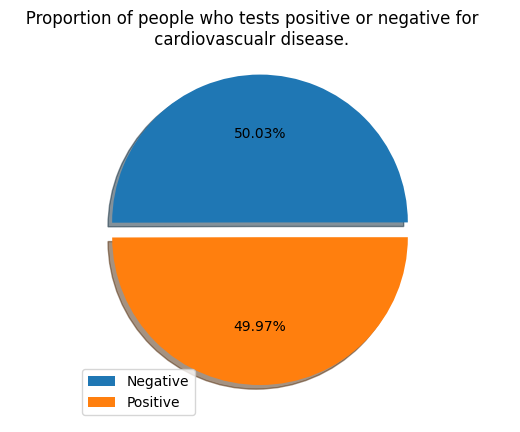

In [3]:
eda_analysis.plot_pos_neg(df);

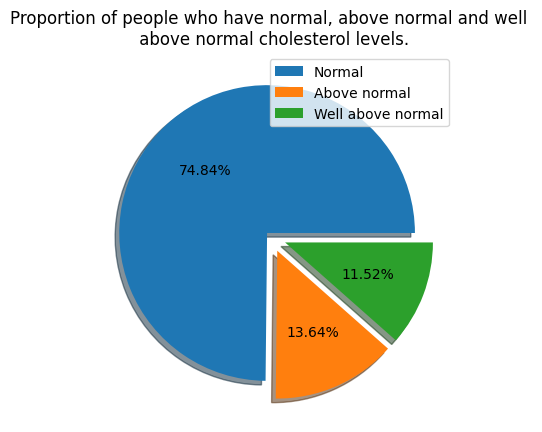

In [4]:
eda_analysis.plot_cholesterol(df);

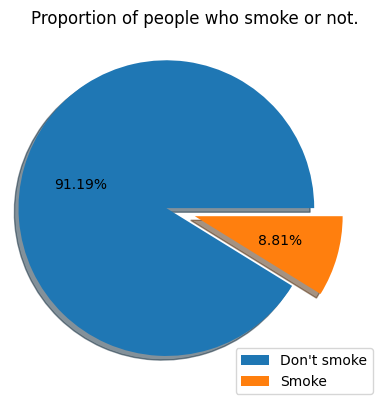

In [5]:
eda_analysis.plot_smoke(df);

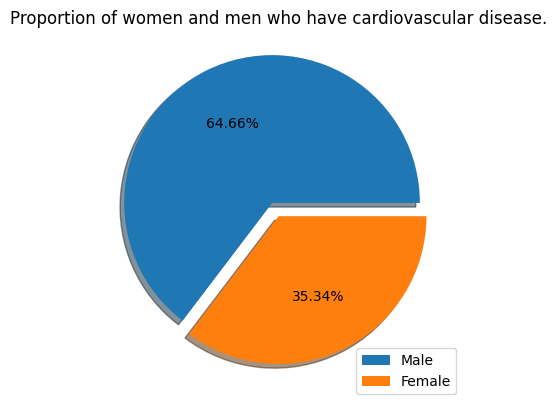

In [6]:
eda_analysis.plot_men_women(df);

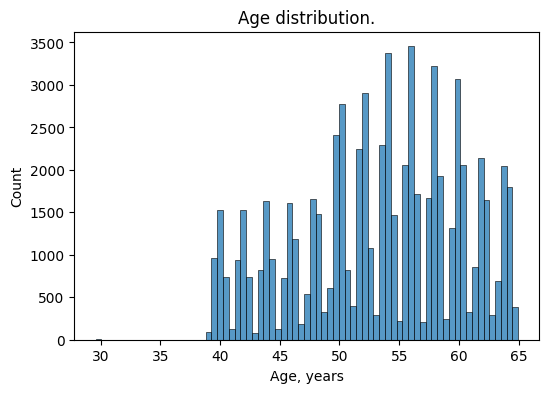

In [7]:
eda_analysis.plot_age(df);

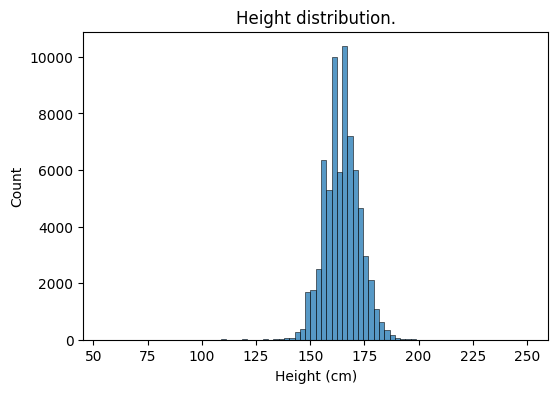

In [8]:
eda_analysis.plot_height(df);

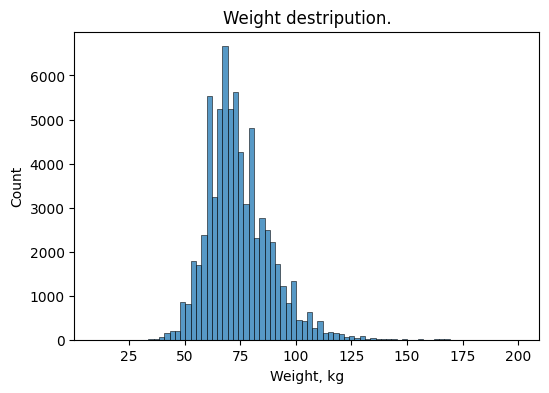

In [9]:
eda_analysis.plot_weight(df);